# <span style="color:red"> Lecture 11
---

### Abstract
In this lecture, our task will be to perform machine learning regression with a Neural Network (NN). The training session will be performed on noisy data generated from a Gaussian distribution $\mathcal{N(\mu, \sigma)}$, where $\mu$ will be defined as:
1. a linear function: $f(x) = 2x + 1$ for $x \in [-1, 1]$;
2. a polynomial function: $f(x) = 4 - 3x - 2x^2 + 3x^3$ for $x \in [-1, 1]$;
3. a trigonometric 2D function: $f(x,y) = \sin(x^2+y^2)$ for $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

The settings for the training session are reported under each exercise presentation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [5]:
def Presentation(exercise):
    # model weights (exercise 11.01)
    if exercise == '01':
        with open("../data/weights_01.dat", 'r') as fp:
            m = float(fp.readline().split("\n")[0])
            c = float(fp.readline().split("\n")[0])
            
        print("Model weights:")
        print(f"m: {format(m, '.5f')},\texpected: {2}")
        print(f"c: {format(c, '.5f')},\texpected: {2}"")
        print('\n')
    
    # model score
    with open(f"../data/test_metric_{exercise}.dat", 'r') as fp:
        loss = float(fp.readline().split("\n")[0])
    print('Model score when evaluated on the test set:')
    print(f"loss={format(loss, '.5f')}")

### Exercise 11.1

Model weights:
m = 1.96714, c = 0.98853


Model score when evaluated on the test set:
loss=0.00048


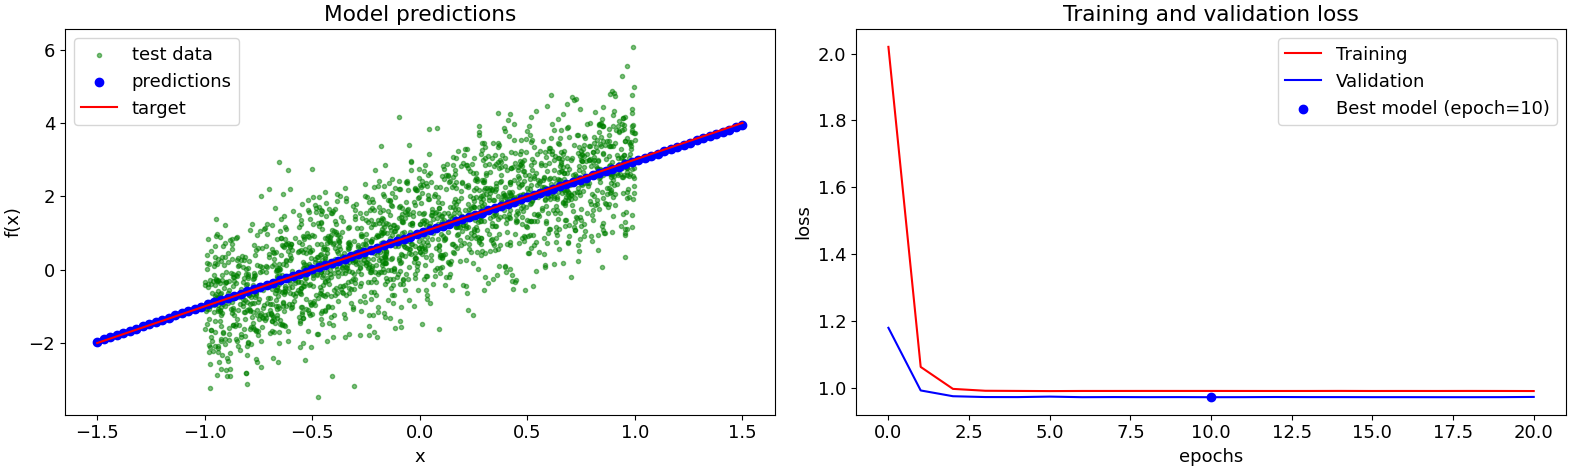

In [8]:
exercise = '01'
Presentation(exercise)
Image(filename=f'../data/results_{exercise}.png')

In this first exercise, since the the underlying function is very basic, we built up our model using just one neuron with a linear activation function:
- Dense layer, with 1 neuron and "linear" activation function.

This actually means that the model function is a straight line, just like the function $f(x)$ that we want to learn to predict. We can observe that, after few epochs ($\approx 2$) the model finds the best parameters to fit the data, which are reported on top of the image. As we can see, they are in good agreement with the actual ones.

---
Settings:
- the training and test set are composed of $N_{data,\,training} = 10000$ and $N_{data,\,test} = 2000$ points, extracted from a Gaussian distribution $\mathcal{N(f(x), \sigma)}$;
- 40% of the training set has been used as validation during the training;
- standard deviation in $\mathcal{N(f(x), \sigma)}$: $\sigma = 1$;
- loss function: Mean Squared Error;
- optimizer: Stochastic Gradient Descent;
- batch size: 32;
- the training is stopped after 10 epochs without improvement of the loss function evaluated on the validation set (with a maximum of 50 epochs).

### Exercise 11.2

Model score when evaluated on the test set:
loss=0.00561


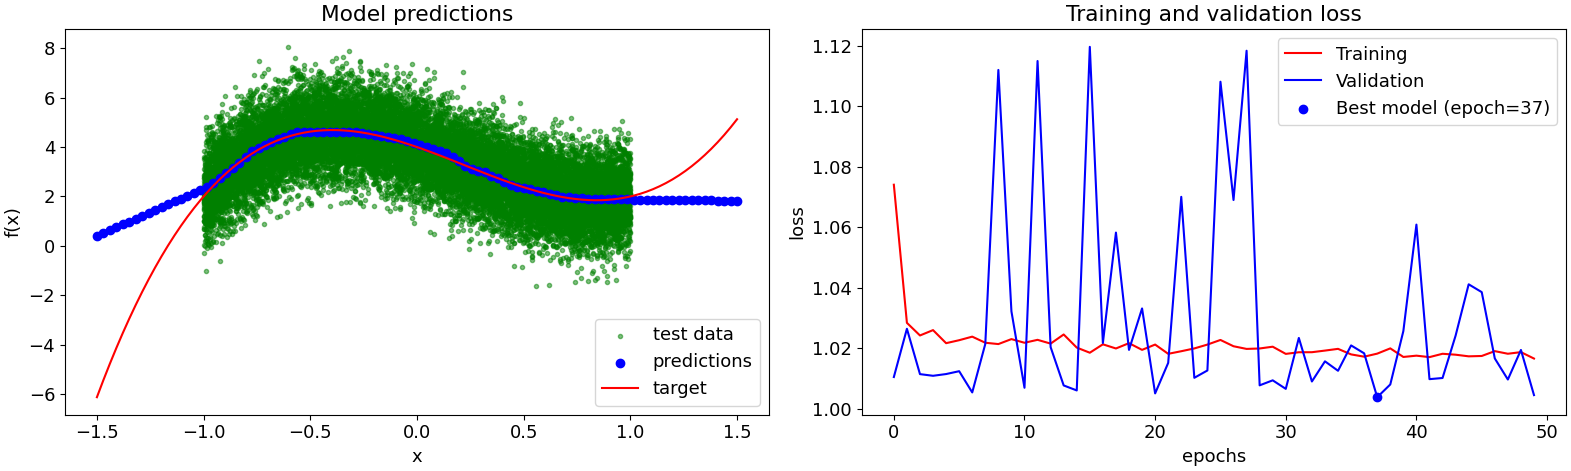

In [4]:
exercise = '02'
Presentation(exercise)
Image(filename=f'../data/results_{exercise}.png')

In this second exercise, the function we are trying to reproduce is a polynomial, hence it is not possible anymore to implement a model with just a neuron with a linear activation function (as in the previous exercise). After some testing, the model has been built up as follows:
- Dense layer, with 64 neurons and "relu" activation function;
- Dense layer, with 32 neurons and "relu" activation function;
- Dense layer, with 1 neuron and "linear" activation function.

The first thing we can observe is that the predictions made by the model outside the training region are completely wrong. This is due to the fact that the shape of the model function outside the range $x \in [-1, 1]$ doesn't partecipate in the training session, since no points have been extracted in that region.

Second of all, the peaks of the loss curve for the validation set are probably due to the small amount of data on which the loss function is evaluated at each epoch (i.e. batch size).

---
Settings:
- the training and test set are composed of $N_{data,\,training} = 100000$ and $N_{data,\,test} = 20000$ points, extracted from a Gaussian distribution $\mathcal{N(f(x), \sigma)}$;
- 40% of the training set has been used as validation during the training;
- standard deviation in $\mathcal{N(f(x), \sigma)}$: $\sigma = 1$;
- loss function: Mean Squared Error;
- optimizer: Stochastic Gradient Descent;
- batch size: 32;
- the training is stopped after 20 epochs without improvement of the loss function evaluated on the validation set (with a maximum of 50 epochs).

### Exercise 11.3

Model score when evaluated on the test set:
loss=0.00745


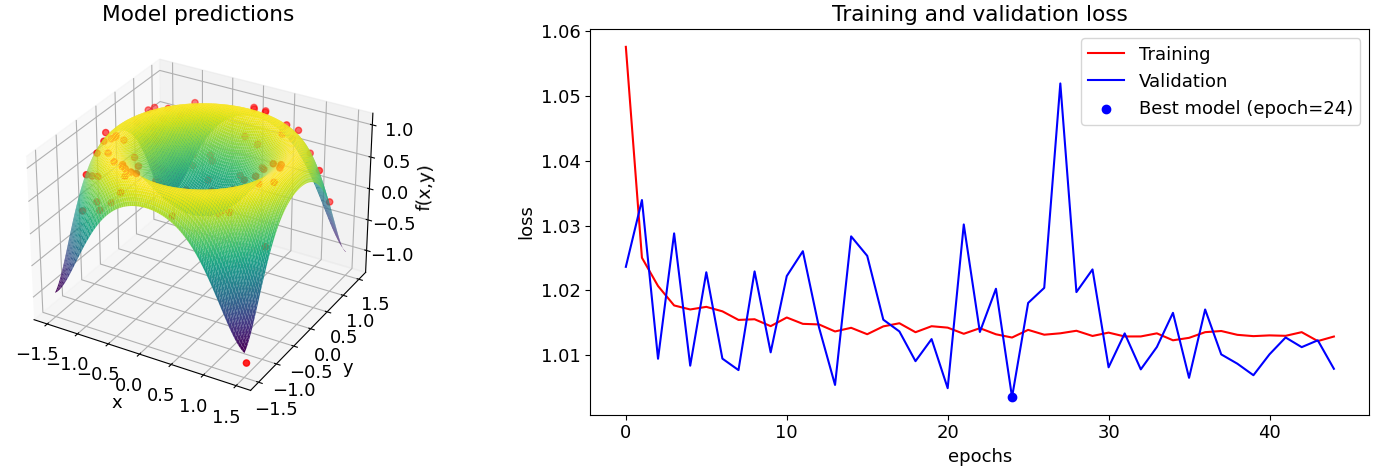

In [5]:
exercise = '03'
Presentation(exercise)
Image(filename=f'../data/results_{exercise}.png')

Lastly, again it is not possible anymore to implement a model with just a neuron with a linear activation function. The model used for this exercise is the same as in the previous one:
- Dense layer, with 64 neurons and "relu" activation function;
- Dense layer, with 32 neurons and "relu" activation function;
- Dense layer, with 1 neuron and "linear" activation function.

Again, the peaks of the loss curve for the validation set are probably due to the small amount of data on which the loss function is evaluated at each epoch (i.e. batch size).

---
Settings:
- the training and test set are composed of $N_{data,\,training} = 100000$ and $N_{data,\,test} = 20000$ points (with dimension dim$(\vec{x}) = 2$), extracted from a Gaussian distribution $\mathcal{N(f(\vec{x}), \sigma)}$;
- 40% of the training set has been used as validation during the training;
- standard deviation in $\mathcal{N(f(\vec{x}), \sigma)}$: $\sigma = 1$;
- loss function: Mean Squared Error;
- optimizer: Stochastic Gradient Descent;
- batch size: 32;
- the training is stopped after 20 epochs without improvement of the loss function evaluated on the validation set (with a maximum of 50 epochs).